In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import activations

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

import keras.backend as K

Using TensorFlow backend.


# Setting up and training a Neural Network for the XOR data

## Aim
To learn the basic notation for implementing multi-layer artificial Neural Networks using Keras/TensorFlow. The function in this case fitting the XOR data

In [2]:
data_in = np.array([[1,1],[-1,1],[1,-1],[-1,-1]])
data_out = np.array([0,1,1,0])

In [3]:
tf.keras.backend.clear_session()

In [4]:
# Initialise model: 2-2-1
hiddenlayerdepth = 2
model = Sequential([
    Dense(hiddenlayerdepth, activation='tanh', input_shape=(2,)),
    Dense(1)
])

model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error')

In [5]:
# fit the model with the data and save the information about the training
history = model.fit(
    data_in,
    data_out,
    epochs=5000,
    verbose=0
)

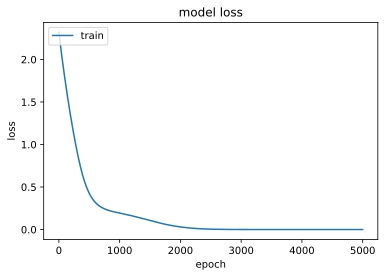

In [6]:
# now we can plot the history to see how the loss function for the
# training and validation set changed with epoch
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [7]:
print(model.predict(data_in))

[[3.6954880e-06]
 [9.9999654e-01]
 [9.9999726e-01]
 [3.3378601e-06]]


In [8]:
npts = 100
xpts = np.linspace(-2,2,npts)
ypts = xpts

xygrids = np.meshgrid(xpts,ypts)

In [12]:
z = [];
for i in range(npts):
    for j in range(npts):
        z.append([xygrids[0][i][j],xygrids[1][i][j]])

In [19]:
zvals = (model.predict(np.array(z)))[:,0]

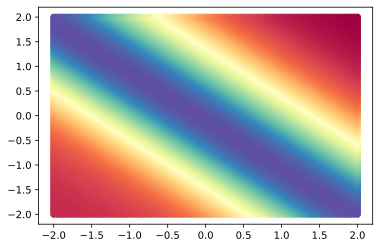

In [20]:
plt.scatter(xygrids[0], xygrids[1], c=zvals, cmap=plt.cm.Spectral)

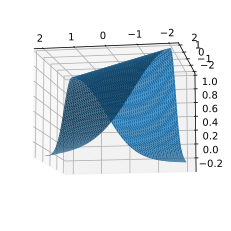

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xygrids[0], xygrids[1], zvals.reshape(xygrids[0].shape))
ax.view_init(-10,100)